# Exploratory Data Analysis(EDA)

*Exploratory Data Analysis (EDA) is the process of examining and summarizing datasets to uncover patterns, relationships, anomalies, and key characteristics, often using statistical techniques and visualizations.*

This notebook analyzes cleaned e-commerce transaction data to uncover
sales trends, customer behavior, and revenue patterns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(".."))#Also look in the project root for modules
from src.data_cleaning import load_path


In [2]:
df=load_path("../data/processed/data_clean.csv")

In [3]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
406828,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.shape

(406829, 8)

In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [12]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [15]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


Which product generate most revenue?

In [21]:
top_products=(
    df.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64

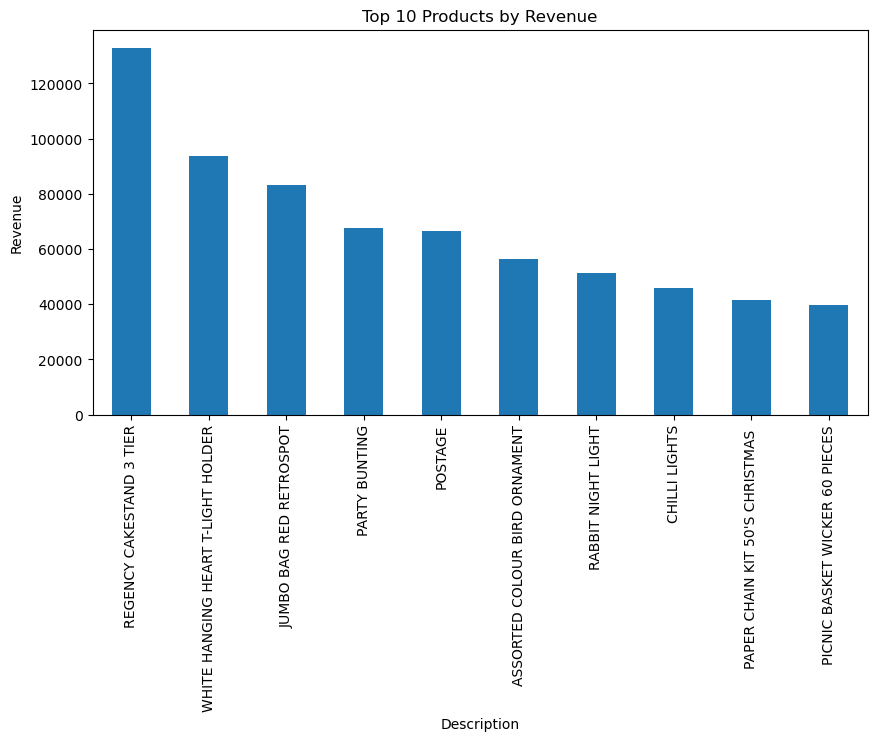

In [25]:
top_products.plot(kind="bar",figsize=(10,5))
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

- *Regency CakeStand 3 Tier* generates the highest total revenue among all products.
- This indicates strong demand and/or higher unit price compared to other items.
- Such products could be prioritized for inventory planning and promotions.

In [22]:
df.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
406809,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
406810,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
406811,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
406812,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80
406813,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,70.80
406814,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.40
406815,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
406816,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
406817,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00
406818,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00


In [23]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


Which country generate most revenue?

In [24]:
country_revenue=(
    df.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)  
)
country_revenue

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64

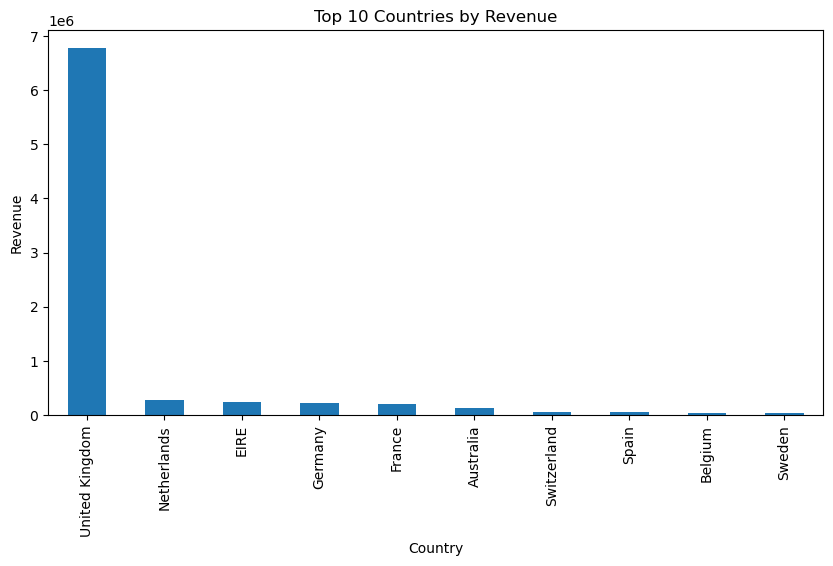

In [31]:
country_revenue.plot(kind="bar",figsize=(10,5))
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.show()


- The United Kingdom contributes the majority of total revenue.
- Revenue from other countries combined is significantly lower than that of the UK, indicating high market concentration.
- There is an opportunity to grow revenue by expanding sales and marketing efforts in international markets.
- Due to consistently high demand, inventory and supply planning should prioritize the UK market.


who are the top customer by total spending?

In [35]:
df["CustomerID"]=df["CustomerID"].astype(int)
top_customers=(
    df.groupby("CustomerID")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers

CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: TotalPrice, dtype: float64

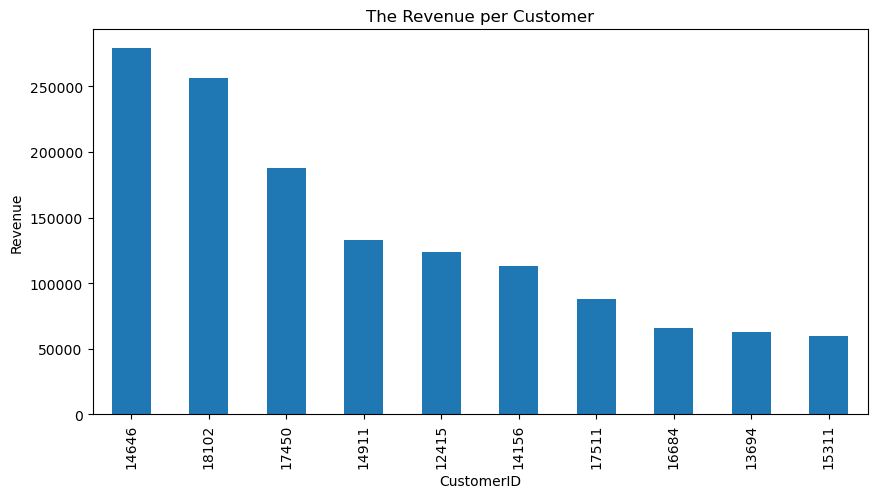

In [36]:
top_customers.plot(kind="bar",figsize=(10,5))
plt.title("The Revenue per Customer")
plt.ylabel("Revenue")
plt.show()

### Top Customers by Revenue
- Customers `14646` and `18102` generate the highest total revenue.
- Several other customers also contribute significantly, showing a small group drives most sales.
- Most top-spending customers are located in the United Kingdom, reflecting the market concentration.
- These insights suggest potential strategies for targeted promotions and loyalty programs.


In [37]:
top_customers_bycountry=(
    df.groupby("Country")["CustomerID"]
    .count()
    .sort_values(ascending=False)
    .head(20)
)
top_customers_bycountry

Country
United Kingdom     361878
Germany              9495
France               8491
EIRE                 7485
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          1877
Portugal             1480
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Austria               401
Denmark               389
Japan                 358
Poland                341
Name: CustomerID, dtype: int64

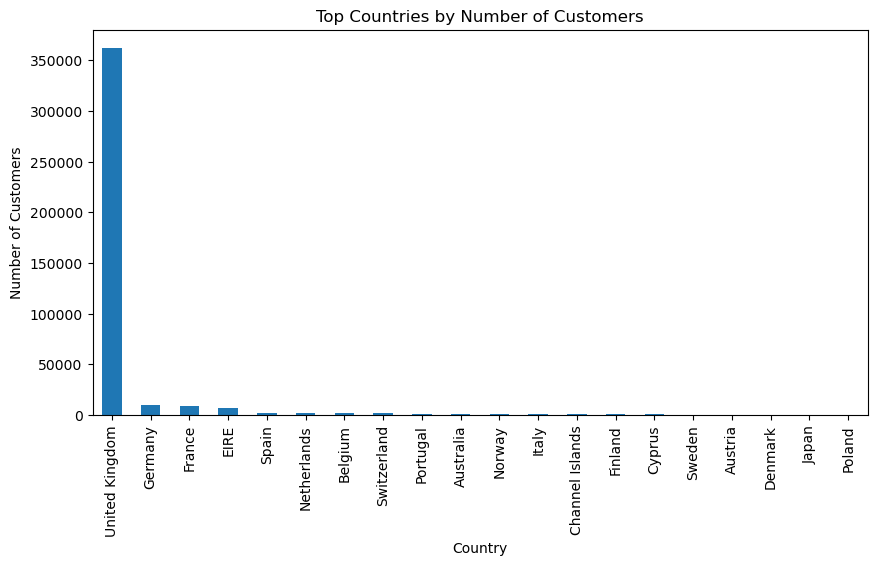

In [38]:
top_customers_bycountry.plot(kind="bar", figsize=(10,5))
plt.title("Top Countries by Number of Customers")
plt.ylabel("Number of Customers")
plt.show()

- The United Kingdom has the highest number of customers: 361,878.
- Germany, France, and EIRE follow, but with far fewer customers: 9,495; 8,491; and 7,485 respectively.
- Other countries like Spain (2,533), Netherlands (2,371), Belgium (2,069), Switzerland (1,877), Portugal (1,480), Australia (1,259), Norway (1,086), and Italy (803) contribute relatively smaller customer bases.
- This shows a **high concentration of customers in the UK**, indicating that the business relies heavily on this market.
- There is potential to **grow the customer base in other countries** through targeted marketing and expansion strategies.

### How does revenue change overtime?

In [39]:
df["Month"]=df["InvoiceDate"].dt.to_period("M")

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [43]:
montly_revenue=df.groupby("Month")["TotalPrice"].sum()
montly_revenue

Month
2010-12     554604.020
2011-01     475074.380
2011-02     436546.150
2011-03     579964.610
2011-04     426047.851
2011-05     648251.080
2011-06     608013.160
2011-07     574238.481
2011-08     616368.000
2011-09     931440.372
2011-10     974603.590
2011-11    1132407.740
2011-12     342506.380
Freq: M, Name: TotalPrice, dtype: float64

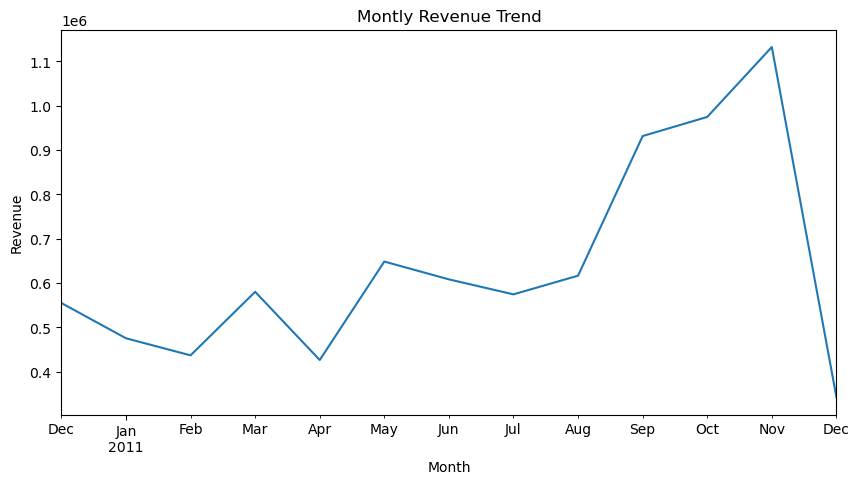

In [44]:
montly_revenue.plot(figsize=(10,5))
plt.title("Montly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

### Revenue Trend Over Time
- From **July to November**, revenue steadily rose, peaking in November.
- This indicates **high seasonal demand** during these months.
- Supply and inventory planning should be prioritized in this period to meet demand efficiently.


In [51]:
montly_revenue.sort_values(ascending=False)

Month
2011-11    1132407.740
2011-10     974603.590
2011-09     931440.372
2011-05     648251.080
2011-08     616368.000
2011-06     608013.160
2011-03     579964.610
2011-07     574238.481
2010-12     554604.020
2011-01     475074.380
2011-02     436546.150
2011-04     426047.851
2011-12     342506.380
Freq: M, Name: TotalPrice, dtype: float64